 ### created by [Nathan Blumenfeld](https://github.com/nathanblumenfeld) 

## Table of Contents
- [Packages](#packages)
- [Data](#data) 
- [Preprocessing](#preprocessing)
- [Visualizations](#visualizations)
- [Analysis](#analysis)


### <a name="ackages"></a>Packages
- [college_scraper](https://nbviewer.jupyter.org/github/nathanblumenfeld/ivybaseball/blob/main/scraper.ipynb), a custom scraper module to obtain and parse college baseball data
- [Pillow](https://pillow.readthedocs.io/en/stable/), a Python-friendly PIL fork
- [plotly](https://plotly.com/python-api-reference/)
- [pandas](https://pandas.pydata.org/docs/)
- [numpy](https://numpy.org/doc/)
- [datetime](https://docs.python.org/3/library/datetime.html)
- warnings, because pandas is annoying

In [2]:
import ipynb.fs.full.scraper as sc
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from PIL import Image
from datetime import datetime

### <a name="data"></a>Data
Player Statistics from NCAA cleaned with...   
Game Results from [boydsworld.com](http://www.boydsworld.com/)  
NCAA D1 Linear Weights from [NCAA](https://stats.ncaa.org/) with processing by [Robert Fray](https://rfrey22.medium.com/collegiate-linear-weights-f0237cf40451)    
NCAA D1 Park Factors from [NCAA](https://stats.ncaa.org/) with processing by [Robert Fray](https://rfrey22.medium.com/collegiate-linear-weights-f0237cf40451)  
Ivy League Standings from  [NCAA](https://stats.ncaa.org/) cleaned with... 

In [53]:
pitching = pd.read_csv("data/pitchingsince2015.csv")
pitching

,player_id,year,school,conference,division,Jersey,Player,Yr,Pos,GP,...,Pitches,GO,FO,W,L,SV,KL,teamid,conference_id,player_url
0,2111707.0,2020,Cornell,Ivy League,1,1,"Lillios, Nikolas",So,P,5.0,...,76.0,6.0,6.0,NaN,NaN,NaN,1.0,167,865,http://stats.ncaa.org/player/index?game_sport_...
1,2111755.0,2020,Cornell,Ivy League,1,32,"Zacharias, Jon",So,P,3.0,...,66.0,5.0,11.0,NaN,NaN,NaN,NaN,167,865,http://stats.ncaa.org/player/index?game_sport_...
2,1997345.0,2020,Cornell,Ivy League,1,26,"Davis, Trevor Daniel",Jr,P,3.0,...,48.0,3.0,3.0,NaN,NaN,NaN,3.0,167,865,http://stats.ncaa.org/player/index?game_sport_...
3,1997324.0,2020,Cornell,Ivy League,1,20,"Urbon, Seth",Sr,P,3.0,...,119.0,6.0,8.0,NaN,2.0,1.0,1.0,167,865,http://stats.ncaa.org/player/index?game_sport_...
4,1884389.0,2020,Cornell,Ivy League,1,31,"Wyatt, Colby",Sr,P,3.0,...,172.0,11.0,16.0,NaN,3.0,NaN,3.0,167,865,http://stats.ncaa.org/player/index?game_sport_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,1547001.0,2015,Cornell,Ivy League,1,37,"Brewer, Ray",So,P,5.0,...,79.0,12.0,9.0,1.0,NaN,NaN,4.0,167,865,http://stats.ncaa.org/player/index?game_sport_...
80,1652392.0,2015,Cornell,Ivy League,1,26,"McCulley, Zach",Sr,P,4.0,...,134.0,7.0,17.0,NaN,1.0,NaN,6.0,167,865,http://stats.ncaa.org/player/index?game_sport_...
81,1546997.0,2015,Cornell,Ivy League,1,12,"Veenema, Ryne",So,P,3.0,...,NaN,9.0,1.0,NaN,NaN,NaN,NaN,167,865,http://stats.ncaa.org/player/index?game_sport_...
82,1439149.0,2015,Cornell,Ivy League,1,21,"Horton, Matt",Jr,P,3.0,...,15.0,NaN,1.0,NaN,2.0,NaN,NaN,167,865,http://stats.ncaa.org/player/index?game_sport_...


In [52]:
batting = pd.read_csv("data/battingsince2015.csv")
batting

,player_id,year,school,conference,division,Jersey,Player,Yr,Pos,GP,...,SH,K,DP,CS,Picked,SB,RBI2out,teamid,conference_id,player_url
0,2347188.0,2020,Cornell,Ivy League,1,30,"Hollerbach, Joe",Fr,INF,9.0,...,NaN,11.0,1.0,NaN,NaN,NaN,NaN,167,865,http://stats.ncaa.org/player/index?game_sport_...
1,1884385.0,2020,Cornell,Ivy League,1,3,"Carnegie, Alex",Sr,INF,9.0,...,NaN,10.0,NaN,1.0,NaN,NaN,NaN,167,865,http://stats.ncaa.org/player/index?game_sport_...
2,1997347.0,2020,Cornell,Ivy League,1,4,"Matton, Kalani",Jr,INF,9.0,...,NaN,9.0,1.0,NaN,NaN,1.0,NaN,167,865,http://stats.ncaa.org/player/index?game_sport_...
3,1997328.0,2020,Cornell,Ivy League,1,21,"Garza, Ramon",Jr,OF,9.0,...,NaN,10.0,2.0,NaN,NaN,1.0,NaN,167,865,http://stats.ncaa.org/player/index?game_sport_...
4,2347184.0,2020,Cornell,Ivy League,1,13,"Russell, Shane",Fr,INF,9.0,...,NaN,17.0,NaN,NaN,NaN,NaN,NaN,167,865,http://stats.ncaa.org/player/index?game_sport_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1439148.0,2015,Cornell,Ivy League,1,5,"Lowell, Eliot",Jr,INF,20.0,...,1.0,6.0,4.0,NaN,NaN,NaN,NaN,167,865,http://stats.ncaa.org/player/index?game_sport_...
82,1546996.0,2015,Cornell,Ivy League,1,3,"Smith, Jamie",So,C,18.0,...,NaN,19.0,NaN,NaN,NaN,NaN,NaN,167,865,http://stats.ncaa.org/player/index?game_sport_...
83,1652421.0,2015,Cornell,Ivy League,1,40,"Le Dorze, Pierre",Fr,OF,13.0,...,NaN,6.0,NaN,NaN,NaN,NaN,NaN,167,865,http://stats.ncaa.org/player/index?game_sport_...
84,1652419.0,2015,Cornell,Ivy League,1,35,"Baur, Trey",Fr,INF,9.0,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,167,865,http://stats.ncaa.org/player/index?game_sport_...


In [10]:
standings = pd.read_csv("data/ivy_league_standings_2015_to_2019.csv")
standings

,Team,2019,2018,2017,2016,2015
0,Brown,5,8,8,7,7
1,Columbia,2,2,3,5,1
2,Cornell,8,6,5,8,4
3,Dartmouth,6,3,4,2,3
4,Harvard,1,4,6,6,5
5,Penn,4,5,2,4,2
6,Princeton,7,7,7,1,8
7,Yale,3,1,1,3,6
8,Champions,Harvard,Columbia,Yale,Princeton,Columbia


In [11]:
games = sc.get_games("Cornell", 2015, 2020)
games

,date,team_1,team_1_score,team_2,team_2_score,field
0,2/21/2015,Gardner-Webb,2,Cornell,1,@Gardner-Webb
1,2/21/2015,Gardner-Webb,3,Cornell,2,@Gardner-Webb
2,2/22/2015,Gardner-Webb,2,Cornell,1,@Gardner-Webb
3,2/27/2015,Seton Hall,3,Cornell,0,@neutral
4,2/28/2015,Cornell,4,Hartford,3,@neutral
...,...,...,...,...,...,...
194,2/29/2020,Niagara,8,Cornell,6,@neutral
195,3/01/2020,Cornell,6,Niagara,5,@neutral
196,3/06/2020,South Carolina,10,Cornell,2,@South Carolina
197,3/07/2020,South Carolina,10,Cornell,3,@South Carolina


In [12]:
linear_weights = pd.read_csv("data/ncaa_d1_woba_linear_weights.csv")
linear_weights

,Season,wOBA,wOBAScale,wBB,wHBP,w1B,w2B,w3B,wHR,R/PA,...,2B,3B,HR,BB,HBP,SO,ERA,PAs,IP,Games
0,2013,0.348,1.123,0.79829,0.81915,0.95954,1.35663,1.71307,2.01798,0.133,...,4.11%,0.58%,1.05%,9.05%,2.67%,16.11%,4.38,650454,144434,16478
1,2014,0.341,1.180,0.78569,0.79812,0.96545,1.36776,1.82269,2.07572,0.129,...,3.94%,0.55%,0.99%,9.02%,2.69%,16.05%,4.23,644153,144059,16369
2,2015,0.349,1.105,0.79783,0.82336,0.95064,1.32426,1.64098,1.96480,0.137,...,4.21%,0.58%,1.40%,9.35%,2.44%,17.24%,4.58,643063,142253,16223
3,2016,0.348,1.102,0.78540,0.79660,0.95240,1.31270,1.70830,1.96578,0.139,...,4.30%,0.60%,1.52%,9.69%,2.37%,17.53%,4.76,660836,145787,16639
4,2017,0.351,1.092,0.77729,0.79205,0.94322,1.30842,1.70758,1.95513,0.143,...,4.33%,0.55%,1.87%,9.94%,2.36%,18.41%,4.96,658772,144815,16523
5,2018,0.354,1.075,0.79647,0.81863,0.94821,1.31856,1.62259,1.93642,0.141,...,4.19%,0.54%,1.77%,10.23%,2.61%,19.25%,4.88,648716,142565,16249
6,2019,0.355,1.045,0.80637,0.82853,0.94698,1.29146,1.60941,1.89128,0.145,...,4.26%,0.56%,1.87%,10.61%,2.57%,19.63%,5.07,660924,144345,16437
7,2020,0.346,1.095,0.79689,0.81968,0.97083,1.28144,1.65008,2.03670,0.139,...,4.06%,0.57%,1.56%,10.80%,2.81%,21.60%,4.71,185041,40715,4649


In [13]:
park_factors = pd.read_csv("data/park_factors.csv")
park_factors

,ballpark,run_diff,park_factor_runs
0,Morehead St.,4.666445,1.848445
1,New Mexico St.,3.577237,1.650407
2,Air Force,3.522267,1.640412
3,Austin Peay,2.792320,1.507695
4,New Mexico,2.713084,1.493288
...,...,...,...
1006,Oregon St.,-1.769450,0.678282
1007,"Corpus Christi, TX",-1.835640,0.666248
1008,Long Beach St.,-1.836610,0.666071
1009,"Omaha, Neb.",-2.061580,0.625167


In [54]:
ivy_pitching = pd.read_excel("data/ivy_league_totals_2012_to_2020.xlsx", sheet_name="pitching")
ivy_pitching = ivy_pitching.set_index("Season")
ivy_pitching

,IP,H,R,ER,BB,SO,SHO,BF,P-OAB,2B-A,...,HR-A,WP,Bk,HB,IBB,SHA,SFA,GO,FO,KL
Season,,,,,,,,,,,,,,,,,,,,,
2020,548.1,668,490,400,345,483,1,2697,2201,121,...,63,92,12,82,11,38,31,517,545,144
2019,2860.3,3193,2071,1775,1405,2203,14,13299,11227,586,...,226,322,25,347,43,160,156,2800,3103,631
2018,2879.7,3242,2003,1712,1241,2346,10,13255,11330,605,...,243,316,42,373,18,160,146,2859,2941,705
2017,2751.5,3080,1848,1564,1160,2145,17,12581,10864,571,...,227,287,39,283,20,141,129,2890,2767,613
2016,2741.5,2966,1799,1534,1189,2017,10,12523,10695,592,...,199,268,29,316,19,205,105,3015,2733,612
2015,2655.3,3107,1986,1606,1139,1925,17,12423,10616,588,...,180,278,28,360,13,169,129,2955,2643,647
2014,2667.4,2791,1628,1325,1027,1985,28,12073,10301,519,...,135,238,49,410,31,219,112,2952,2651,632
2013,2729.2,2871,1654,1316,1093,1994,24,12404,10578,522,...,116,265,19,371,35,233,122,3043,2726,649
2012,2801.9,3191,1976,1640,1320,2003,16,13100,11025,578,...,154,297,32,382,51,231,137,3049,2844,632


In [55]:
ivy_batting = pd.read_excel("data/ivy_league_totals_2012_to_2020.xlsx", sheet_name="batting")
ivy_batting = ivy_batting.set_index("Season")
ivy_batting

,BA,OBPct,R,AB,H,2B,3B,HR,RBI,BB,HBP,SF,SH,K,DP,CS,SB
Season,,,,,,,,,,,,,,,,,
2020,0.233,0.317,257,2219,518,93,14,34,232,223,54,14,26,683,31,21,69
2019,0.271,0.360,1842,11384,3089,599,95,215,1654,1362,284,139,147,2372,251,115,328
2018,0.258,0.342,1679,11421,2945,489,59,178,1503,1218,302,120,104,2653,256,87,260
2017,0.278,0.358,1814,11045,3075,592,77,218,1642,1165,278,120,112,2397,238,126,272
2016,0.260,0.340,1491,10730,2786,565,73,173,1359,1088,266,84,179,2192,222,116,258
2015,0.273,0.351,1612,10668,2908,597,59,160,1438,1070,281,98,126,2107,275,293,293
2014,0.260,NaN,1437,10510,2731,503,63,130,1291,920,339,97,189,2082,191,108,295
2013,NaN,NaN,1437,10652,2746,521,56,115,1288,1025,297,105,208,2123,240,101,349
2012,NaN,NaN,1768,11241,3119,581,88,151,1587,1135,332,108,195,2193,226,144,325


### <a name="preprocessing"></a>Preprocessing

In [14]:
   def get_rd_data(team_name, start, end):
        """
        Returns: Dataframe with run_difference, opponent, and cumulative_rd for every game of given team
        in given seasons. 
        
        Parameter team_name: team to return games for
        Precondtion: team_name is a string
        Parameter start: start year, inclusive
        Precondition: start is a int 
        Parameter end: end year, inclusive
        Preconditon: end is an int
        """
        games = sc.get_games(team_name, start=start, end=end)
        games["date"] =  pd.to_datetime(games["date"])
        games = games.sort_values(by="date")
        games = games.reset_index(drop="True")
        games = sc.add_run_difference_column(team_name, games)
        games = games.drop(columns=["team_1","team_1_score","team_2","team_2_score","field"])
        games["date"] = games["date"].dt.strftime('%Y-%m-%d')
        return games
    
get_rd_data("Cornell",2010,2020)

,date,run_difference,opponent,cumulative_rd
0,2010-03-16,-2,Binghamton,-2
1,2010-03-16,5,Binghamton,3
2,2010-03-21,1,Northwestern,4
3,2010-03-22,1,Northwestern,5
4,2010-03-23,-5,Florida Atlantic,0
...,...,...,...,...
399,2020-02-29,-2,Niagara,-274
400,2020-03-01,1,Niagara,-273
401,2020-03-06,-8,South Carolina,-281
402,2020-03-07,-7,South Carolina,-288


In [17]:
# Pythagenpat intra-conference win %'s by team for the Ivy League
def generate_ivy_pythags(start, end):
    """
    Returns: Dataframe of actual and expected winning percentages of Ivy League for a given set of seasons. 
    Parameter start: start year, inclusive
    Precondition: start is an int YYYY
    Parameter end: end year, inclusive
    Precondtion: end is an int YYYY
    """
    assert type(start) == int, "start must be an int"
    assert type(end) == int, "end must be an int"
    ivy_pythagenpat = {"team_name":[], "pythagenpat_pct":[], "actual_pct":[], "deviation":[]};
    for i in ["Brown", "Columbia", "Cornell", "Dartmouth", "Harvard", "Pennsylvania", "Princeton", "Yale"]:
        games = sc.get_intra_ivy(i,start,end)
        pythagenpat_pct = sc.pythag_win_percentage_from_df(i,games)  
        actual_pct = sc.actual_win_percentage_from_df(i,games)  
        deviation = abs(round(pythagenpat_pct - actual_pct,2))
        ivy_pythagenpat["team_name"].append(i)
        ivy_pythagenpat["pythagenpat_pct"].append(round(pythagenpat_pct,2))
        ivy_pythagenpat["actual_pct"].append(round(actual_pct,2))
        ivy_pythagenpat["deviation"].append(deviation)
        results = pd.DataFrame(ivy_pythagenpat)
    return results

generate_ivy_pythags(2015,2020)

,team_name,pythagenpat_pct,actual_pct,deviation
0,Brown,0.40,0.35,0.04
1,Columbia,0.60,0.62,0.02
2,Cornell,0.44,0.41,0.02
3,Dartmouth,0.54,0.56,0.02
4,Harvard,0.53,0.49,0.04
5,Pennsylvania,0.62,0.56,0.05
6,Princeton,0.37,0.39,0.02
7,Yale,0.52,0.59,0.06


In [72]:
def get_woba(player_id, year):
    """
    Returns: The Weighted On-Base Average  for a given player in a given season
    
    wOBA = (wBB×uBB + wHBP×HBP + w1B×1B + w2B×2B + w3B×3B +
    wHR×HR) / (AB + BB – IBB + SF + HBP)
    PA = AB + BB - IBB + SF + HBP 
    
    Parameter player_id: The ID of player to return for
    Precondition: player_id is 
    Parameter year: The season to return for 
    Precondition: year is an INT 
    """
    season_batting = pd.read_csv("data/cornellbatting"+str(year)+".csv")
    player_batting =  season_batting[season_batting.player_id==player_id]
    player_batting = player_batting.fillna(0)
    linear_weights = pd.read_csv("data/ncaa_d1_woba_linear_weights.csv")
    season_weights = linear_weights[linear_weights.Season==year]
    wbb = season_weights["wBB"].values[0]
    whbp = season_weights["wHBP"].values[0]
    w1b = season_weights["w1B"].values[0]
    w2b = season_weights["w2B"].values[0]
    w3b = season_weights["w3B"].values[0]
    whr = season_weights["wHR"].values[0]
    walks = player_batting["BB"].values[0]
    hits_by_pitch = player_batting["HBP"].values[0]
    doubles = player_batting["2B"].values[0]
    triples = player_batting["3B"].values[0]
    home_runs = player_batting["HR"].values[0]
    hits =  player_batting["H"].values[0]
    singles = hits-(doubles+triples+home_runs)
    at_bats = player_batting["AB"].values[0]
    sac_flies = player_batting["SF"].values[0]
    sac_bunts = player_batting["SH"].values[0]
    plate_appearances = at_bats+walks+sac_flies+sac_bunts+hits_by_pitch
    woba = (wbb*walks+whbp*hits_by_pitch+w1b*singles+w2b*doubles+w3b*triples+whr*home_runs)/plate_appearances
    return woba

get_woba(1779085, 2017)

0.44225271739130434

In [73]:
def get_wrc(player_id, year):
    """
    Returns: The Weighted Runs Created  for a given player in a given season
    
    wRC = [((wOBA - lgwOBA)/wOBAScale) + (lgR/PA)] * PA
    PA = AB + BB - IBB + SF + HBP 

    Parameter player_id: The ID of player to return for
    Precondition: player_id is 
    Parameter year: The season to return for 
    Precondition: year is an INT 
    """
    season_batting = pd.read_csv("data/cornellbatting"+str(year)+".csv")
    player_batting =  season_batting[season_batting.player_id==player_id]
    player_batting = player_batting.fillna(0)
    linear_weights = pd.read_csv("data/ncaa_d1_woba_linear_weights.csv")
    season_weights = linear_weights[linear_weights.Season==year]
    league_woba = season_weights["wOBA"].values[0]
    woba_scale = season_weights["wOBAScale"].values[0]
    league_runs_per_pa = season_weights["R/PA"].values[0]
    player_woba = get_woba(player_id, year)   
    at_bats = player_batting["AB"].values[0]
    walks = player_batting["BB"].values[0]
    sac_flies = player_batting["SF"].values[0]
    sac_bunts = player_batting["SH"].values[0]
    hits_by_pitch = player_batting["HBP"].values[0]
    plate_appearances = at_bats+walks+sac_flies+sac_bunts+hits_by_pitch
    wrc = ((((player_woba-league_woba)/woba_scale)+league_runs_per_pa))*plate_appearances
    return wrc

get_wrc(1779085,2017)

20.84395787545787

In [74]:
def get_wraa(player_id, year):
    """
    Returns: The Weighted Runs Above Average (wRAA) for a given player in a given season
    
    [(wOBA−leagueWOBA) / wOBAscale] ∗ PA
    PA = AB + BB - IBB + SF + HBP 

    Parameter player_id: The ID of player to return for
    Precondition: player_id is 
    Parameter year: The season to return wRC for 
    Precondition: year is an INT 
    """
    season_batting = pd.read_csv("data/cornellbatting"+str(year)+".csv")
    player_batting =  season_batting[season_batting.player_id==player_id]
    player_batting = player_batting.fillna(0)
    linear_weights = pd.read_csv("data/ncaa_d1_woba_linear_weights.csv")
    season_weights = linear_weights[linear_weights.Season== year]
    league_woba = season_weights["wOBA"].values[0]
    woba_scale = season_weights["wOBAScale"].values[0]
    league_runs_per_pa = season_weights["R/PA"].values[0]
    player_woba = get_woba(player_id, year)
    at_bats = player_batting["AB"].values[0]
    walks = player_batting["BB"].values[0]
    sac_flies = player_batting["SF"].values[0]
    sac_bunts = player_batting["SH"].values[0]
    hits_by_pitch = player_batting["HBP"].values[0]
    plate_appearances = at_bats+walks+sac_flies+sac_bunts+hits_by_pitch
    wraa = ((((player_woba-league_woba)/woba_scale)))*(plate_appearances)
    return wraa

get_wraa(1779085,2017)

7.687957875457871

In [78]:
def get_cornell_woba(year):
    """
    Returns: The Weighted On-Base Average  for a given player in a given season
    
    wOBA = (wBB×uBB + wHBP×HBP + w1B×1B + w2B×2B + w3B×3B +
    wHR×HR) / (AB + BB – IBB + SF + HBP)
    PA = AB + BB - IBB + SF + HBP 

    Parameter year: The season to return for 
    Precondition: year is an INT 2012-2020
    """
    linear_weights = pd.read_csv("data/ncaa_d1_woba_linear_weights.csv")
    season_weights = linear_weights[linear_weights.Season==year]
    wbb = season_weights["wBB"].values[0]
    whbp = season_weights["wHBP"].values[0]
    w1b = season_weights["w1B"].values[0]
    w2b = season_weights["w2B"].values[0]
    w3b = season_weights["w3B"].values[0]
    whr = season_weights["wHR"].values[0]
    totals = pd.read_excel("data/cornell_totals_2012_to_2020.xlsx")
    season_totals = totals[totals.Season==year]
    walks = season_totals["BB"].values[0]
    hits_by_pitch = season_totals["HBP"].values[0]
    doubles = season_totals["2B"].values[0]
    triples = season_totals["3B"].values[0]
    home_runs = season_totals["HR"].values[0]
    hits = season_totals["H"].values[0]
    singles =  hits-(doubles+triples+home_runs)
    at_bats = season_totals["AB"].values[0]
    sac_flies = season_totals["SF"].values[0]
    sac_bunts = season_totals["SH"].values[0]
    plate_appearances = at_bats+walks+sac_flies+sac_bunts+hits_by_pitch
    woba = (wbb*walks+whbp*hits_by_pitch+w1b*singles+w2b*doubles+w3b*triples+whr*home_runs)/plate_appearances
    return woba

get_cornell_woba(2019)

0.2962856623931624

In [94]:
def get_ivy_woba(year):
        """
        Returns: Ivy League Weighted On-Base Average in a given season

        wOBA = (wBB×uBB + wHBP×HBP + w1B×1B + w2B×2B + w3B×3B +
        wHR×HR) / (AB + BB – IBB + SF + HBP)
        PA = AB + BB - IBB + SF + HBP 

        Parameter year: The season to return for 
        Precondition: year is an INT 2012-2020
        """  
        linear_weights = pd.read_csv("data/ncaa_d1_woba_linear_weights.csv")
        season_weights = linear_weights[linear_weights.Season==year]
        wbb = season_weights["wBB"].values[0]
        whbp = season_weights["wHBP"].values[0]
        w1b = season_weights["w1B"].values[0]
        w2b = season_weights["w2B"].values[0]
        w3b = season_weights["w3B"].values[0]
        whr = season_weights["wHR"].values[0]
        ivy_totals = pd.read_excel("data/ivy_league_totals_2012_to_2020.xlsx", sheet_name="batting")
        season_totals = ivy_totals[ivy_totals.Season==year]
        walks = season_totals["BB"].values[0]
        hits_by_pitch = season_totals["HBP"].values[0]
        doubles = season_totals["2B"].values[0]
        triples = season_totals["3B"].values[0]
        home_runs = season_totals["HR"].values[0]
        hits = season_totals["H"].values[0]
        singles =  hits-(doubles+triples+home_runs)
        at_bats = season_totals["AB"].values[0]
        sac_flies = season_totals["SF"].values[0]
        sac_bunts = season_totals["SH"].values[0]
        plate_appearances = at_bats+walks+sac_flies+sac_bunts+hits_by_pitch
        woba = (wbb*walks+whbp*hits_by_pitch+w1b*singles+w2b*doubles+w3b*triples+whr*home_runs)/plate_appearances
        return woba

get_ivy_woba(2018)

0.33472055601974937

In [55]:
def get_cornell_wrc_plus(player_id, year): 
    """
    Returns: wRC+ for a given player in given season

    wRC is a normalized, adjusting for park factors and run-scoring environment
    (((wRAA per PA + league runs per PA) + (league runs per PA - ballpark factor x league runs per PA) /
    league wRC per plate appearance, not including pitchers)) x 100.
    
    Parameter: player_id
    Precondtion: player_id is..
    Parameter year: season to return for
    Precondtion: year is an int YYYY
    """
#     linear_weights = pd.read_csv("data/ncaa_d1_woba_linear_weights.csv")
#     season_weights = linear_weights[linear_weights.Season==year]
#     league_woba = season_weights["wOBA"].values[0]
#     woba_scale = season_weights["wOBAScale"].values[0]
#     league_runs_per_pa = season_weights["R/PA"].values[0]
#     wraa = get_wraa(player_id, year)
#     park_factor = park_factors[park_factors["ballpark"]=="Cornell"]["park_factor_runs"].values[0]
#     at_bats = player_batting["AB"].values[0]
#     walks = player_batting["BB"].values[0]
#     sac_flies = player_batting["SF"].values[0]
#     sac_bunts = player_batting["SH"].values[0]
#     hits_by_pitch = player_batting["HBP"].values[0]
#     plate_appearances = at_bats+walks+sac_flies+sac_bunts+hits_by_pitch
#     wraa_per_pa = wraa/plate_appearances
#     wrc_plus = (((wraa_per_pa+league_runs_per_pa)+(league_runs_per_pa-park_factor*league_runs_per_pa)/(#league_) 
#     return wrc_plus
    pass

In [126]:
    def get_cornell_batting_stats(start):
        """
        Returns: 
        """
        batting = pd.read_csv("data/battingsince"+str(start)+".csv")
        batting = batting.loc[batting['BA']>0, :]
        team_list = {"player_id":[], "name":[], "year":[], "woba":[], "wrc":[], "wraa":[], "class_year":[]}
        for i in range(len(batting)):
            player_id = batting.iloc[i, 0]
            player = batting.iloc[i,6]
            year = batting.iloc[i, 1]
            class_year = batting.iloc[i,7]
            woba = get_woba(player_id, year)
            wrc  = get_wrc(player_id, year)
            wraa  = get_wraa(player_id, year)
            team_list["player_id"].append(player_id)
            team_list["class_year"].append(class_year)
            team_list["name"].append(player)
            team_list["year"].append(year)
            team_list["woba"].append(woba)
            team_list["wrc"].append(wrc)
            team_list["wraa"].append(wraa)
        res = pd.DataFrame(team_list)
        return res

get_cornell_batting_stats(2015)

,player_id,name,year,woba,wrc,wraa,class_year
0,2347188.0,"Hollerbach, Joe",2020,0.261942,2.053749,-2.533251,Fr
1,1884385.0,"Carnegie, Alex",2020,0.305891,3.173484,-1.135516,Sr
2,1997347.0,"Matton, Kalani",2020,0.301949,3.061895,-1.247105,Jr
3,1997328.0,"Garza, Ramon",2020,0.306521,3.706064,-1.297936,Jr
4,2347184.0,"Russell, Shane",2020,0.183941,-0.323973,-5.327973,Fr
...,...,...,...,...,...,...,...
81,1439148.0,"Lowell, Eliot",2015,0.241800,1.639443,-3.977557,Jr
82,1546996.0,"Smith, Jamie",2015,0.205158,0.341294,-6.508706,So
83,1652421.0,"Le Dorze, Pierre",2015,0.531137,7.243910,3.955910,Fr
84,1652419.0,"Baur, Trey",2015,0.259539,1.457032,-2.104968,Fr


In [121]:
def get_fip(player_id, year):
    """
    Returns: Fielding Independent Pitching for a given player in a given season
    
    FIP = ((13*HR)+(3*(BB+HBP))-(2*K))/IP + constant
    FIP Constant = lgERA – (((13*lgHR)+(3*(lgBB+lgHBP))-(2*lgK))/lgIP)

    Parameter player_id: The ID of player to return for
    Precondition: player_id is 
    Parameter year: The season to return wRC for 
    Precondition: year is an INT 
    """
    season_pitching = pd.read_csv("data/cornellpitching"+str(year)+".csv")
    player_pitching =  season_pitching[season_pitching.player_id==player_id]
    player_pitching = player_pitching.fillna(0)
    strike_outs = player_pitching["SO"].values[0]
    hit_batters = player_pitching["HB"].values[0]
    walks_given = player_pitching["BB"].values[0]
    home_runs_allowed = player_pitching["HR-A"].values[0]
    strike_outs = player_pitching["IP"].values[0]
    linear_weights = pd.read_csv("data/ncaa_d1_woba_linear_weights.csv")
    season_weights = linear_weights[linear_weights.Season== year]
    fip_constant =season_weights["cFIP"].values[0]
    fip = (((13*home_runs_allowed)+(3*(walks_given+hit_batters))-(2*strike_outs))/strike_outs) + fip_constant
    return fip

get_fip(1546998, 2017)

3.416944055944056

In [120]:
  def get_cornell_fip(year):
    """
    Returns: Cornell total  Fielding Independent Pitching (FIP) for a given player in a given season
    
    FIP = ((13*HR)+(3*(BB+HBP))-(2*K))/IP + constant
    FIP Constant = lgERA – (((13*lgHR)+(3*(lgBB+lgHBP))-(2*lgK))/lgIP)

    Parameter player_id: The ID of player to return for
    Precondition: player_id is 
    Parameter year: The season to return wRC for 
    Precondition: year is an INT 
    """
    cu_pitching = pd.read_csv("data/cornellpitching"+str(year)+".csv")
    season_totals = cu_pitching[cu_pitching.Player=="Totals"]
    strike_outs = season_totals["SO"].values[0]
    hit_batters = season_totals["HB"].values[0]
    walks_given = season_totals["BB"].values[0]
    home_runs_allowed = season_totals["HR-A"].values[0]
    strike_outs = season_totals["IP"].values[0]
    linear_weights = pd.read_csv("data/ncaa_d1_woba_linear_weights.csv")
    season_weights = linear_weights[linear_weights.Season== year]
    fip_constant =season_weights["cFIP"].values[0]
    fip = (((13*home_runs_allowed)+(3*(walks_given+hit_batters))-(2*strike_outs))/strike_outs) + fip_constant
    return fip

get_cornell_fip(2015)

3.850534334078569

In [119]:
def get_ivy_fip(year):
    """
    Returns: Ivy League total Fielding Independent Pitching (FIP) for a given season
    
    FIP = ((13*HR)+(3*(BB+HBP))-(2*K))/IP + constant
    FIP Constant = lgERA – (((13*lgHR)+(3*(lgBB+lgHBP))-(2*lgK))/lgIP)

    Parameter year: The season to return fip for 
    Precondition: year is an INT 
    """
    ivy_pitching = pd.read_excel("data/ivy_league_totals_2012_to_2020.xlsx", sheet_name="pitching")
    season_totals = ivy_pitching[ivy_pitching.Season==year]
    walks = season_totals["BB"].values[0]   
    strike_outs = season_totals["SO"].values[0]
    hit_batters = season_totals["HB"].values[0]
    walks_given = season_totals["BB"].values[0]
    home_runs_allowed = season_totals["HR-A"].values[0]
    strike_outs = season_totals["IP"].values[0]
    linear_weights = pd.read_csv("data/ncaa_d1_woba_linear_weights.csv")
    season_weights = linear_weights[linear_weights.Season== year]
    fip_constant =season_weights["cFIP"].values[0]
    fip = (((13*home_runs_allowed)+(3*(walks_given+hit_batters))-(2*strike_outs))/strike_outs) + fip_constant
    return fip

get_ivy_fip(2017)

4.506829547519535

In [25]:
def get_era(player_id, year): 
    """
    Returns: ERA for a given player in a given season 
    
    Parameter player_id: The ID of player to return for
    Precondition: player_id is 
    Parameter year: The season to return wRC for 
    Precondition: year is an INT 
    """
    season_pitching = pd.read_csv("data/cornellpitching"+str(year)+".csv")
    player_pitching =  season_pitching[season_pitching.player_id==player_id]
    player_pitching = player_pitching.fillna(0)
    era = player_pitching["ERA"].values[0]
    return era

get_era(1546998, 2017)

2.18

In [26]:
def get_runs_per_ip(player_id, year):
    """
    Returns: runs per innings pitched
    
    runs allowed / innings pitched
    
    """
    season_pitching = pd.read_csv("data/cornellpitching"+str(year)+".csv")
    player_pitching =  season_pitching[season_pitching.player_id==player_id]
    player_pitching = player_pitching.fillna(0)
    runs_allowed = player_pitching["R"].values[0]
    innings_pitched = player_pitching["IP"].values[0]
    res = runs_allowed/innings_pitched
    return res

get_runs_per_ip(1546998, 2017)

0.4020979020979021

In [124]:
def get_cornell_pitching_stats(start):
    """
    Returns: Dataframe of advanced pitching statistics
    """
    pitching = pd.read_csv("data/pitchingsince"+str(start)+".csv")
    pitching = pitching.loc[pitching['App']>0, :]
    team_list = {"player_id":[], "name":[], "year":[], "innings_pitched":[], "runs":[], "era":[], "fip":[], "runs_per_ip":[],"class_year":[]}
    for i in range(len(pitching)):
        player_id = pitching.iloc[i, 0]
        player = pitching.iloc[i,6]
        year = pitching.iloc[i, 1]
        class_year = pitching.iloc[i,7]
        innings_pitched = pitching.iloc[i, 13]
        runs_allowed = pitching.iloc[i, 15]
        era = get_era(player_id, year)
        fip = get_fip(player_id, year)
        runs_per_ip = get_runs_per_ip(player_id, year)
        team_list["player_id"].append(player_id)
        team_list["innings_pitched"].append(innings_pitched)
        team_list["runs"].append(runs_allowed)
        team_list["class_year"].append(class_year)
        team_list["name"].append(player)
        team_list["year"].append(year)
        team_list["era"].append(era)
        team_list["fip"].append(fip)
        team_list["runs_per_ip"].append(runs_per_ip)
    res = pd.DataFrame(team_list)
    return res

get_cornell_pitching_stats(2015)

,player_id,name,year,innings_pitched,runs,era,fip,runs_per_ip,class_year
0,2111707.0,"Lillios, Nikolas",2020,5.1,1.0,1.69,2.497235,0.196078,So
1,2111755.0,"Zacharias, Jon",2020,6.2,9.0,6.75,6.909000,1.451613,So
2,1997345.0,"Davis, Trevor Daniel",2020,4.2,2.0,1.93,6.909000,0.476190,Jr
3,1997324.0,"Urbon, Seth",2020,7.0,6.0,6.43,7.766143,0.857143,Sr
4,1884389.0,"Wyatt, Colby",2020,14.1,17.0,5.65,6.377085,1.205674,Sr
...,...,...,...,...,...,...,...,...,...
79,1547001.0,"Brewer, Ray",2015,12.1,8.0,2.19,4.542917,0.661157,So
80,1652392.0,"McCulley, Zach",2015,12.1,10.0,7.30,5.121430,0.826446,Sr
81,1546997.0,"Veenema, Ryne",2015,5.0,10.0,18.00,9.733000,2.000000,So
82,1439149.0,"Horton, Matt",2015,1.0,5.0,27.00,10.733000,5.000000,Jr


In [60]:
team_name = "Cornell"
games = sc.get_intra_ivy(team_name, 2010, 2020)
games["date"] =  pd.to_datetime(games["date"])
games = games.sort_values(by="date")
games = games.reset_index(drop="True")
games = sc.add_run_difference_column(team_name, games)
cu_df = pd.DataFrame({"date":games.date, team_name:games.cumulative_rd}, index=games.index)

team_name = "Brown"
games = sc.get_intra_ivy(team_name, 2010, 2020)
games["date"] =  pd.to_datetime(games["date"])
games['month'] = pd.DatetimeIndex(games['date']).month
games = games.sort_values(by="date")
games = games.reset_index(drop="True")
games = sc.add_run_difference_column(team_name, games)
br_df = pd.DataFrame({"date" : games.date, team_name: games.cumulative_rd}, index=games.index)

df = pd.merge(cu_df, br_df,how="outer",on="date")
df = df.sort_values(by="date")
df = df.reset_index(drop="True")
df = df.fillna(method="pad")
df.set_index("date")
df = pd.melt(df, id_vars=["date"], value_vars=["Cornell", "Brown"])
df = df.sort_values(by="date")
df = df.rename(columns={"variable": "team_name", "value": "cum_rd"})
format_str = "%Y-%m-%d"
df["date"] = df["date"].dt.strftime('%Y-%m-%d')
df 

,date,team_name,cum_rd
0,2010-04-03,Cornell,2.0
1,2010-04-03,Cornell,2.0
2,2010-04-03,Cornell,-13.0
3,2010-04-03,Cornell,-13.0
393,2010-04-03,Brown,4.0
...,...,...,...
386,2019-05-04,Cornell,-128.0
782,2019-05-05,Brown,-259.0
390,2019-05-05,Cornell,-132.0
391,2019-05-06,Cornell,-132.0


### <a name="visualizations"></a>Visualizations


In [35]:
def generate_rd_chart(team_name, start, end):
    """
    generates a cumulative run differential bar chart
    """
    games = sc.get_intra_ivy(team_name, start=start, end=end)
    games["date"] =  pd.to_datetime(games["date"])
    games = games.sort_values(by="date")
    games = games.reset_index(drop="True")
    games = sc.add_run_difference_column(team_name, games)
    fig = px.bar(games,x=games.index, y="cumulative_rd",
        hover_data=["opponent", "date"], color="cumulative_rd", color_continuous_scale=px.colors.diverging.balance,
        color_continuous_midpoint=0,labels={"cumulative_rd":"Run Differential"})
    img = Image.open("resources/logos/"+team_name+".png")
    fig.update_layout( 
    title = "Cumulative Run Differential<br>"+str(start)+" to "+str(end),
    title_font_size = 20,
    title_xanchor = "center",
    title_yanchor = "top",
    title_x =  0.5,
    yaxis_title="Cumulative Run Differential",
    xaxis_title="Games Played",
    margin=dict(l=40, r=20, t=125, b=20)
    )
    
    fig.update_yaxes(
    ticklabelposition="inside top",
    )
    fig.add_layout_image(
    dict(
        source=img,
        xref="paper", yref="paper",
        xanchor="left", yanchor="top",
        x=-0.02, y=1.325,
        sizex=0.3, sizey=0.3
        )
    )
    fig.update_coloraxes(showscale=False)
    fig.show() 


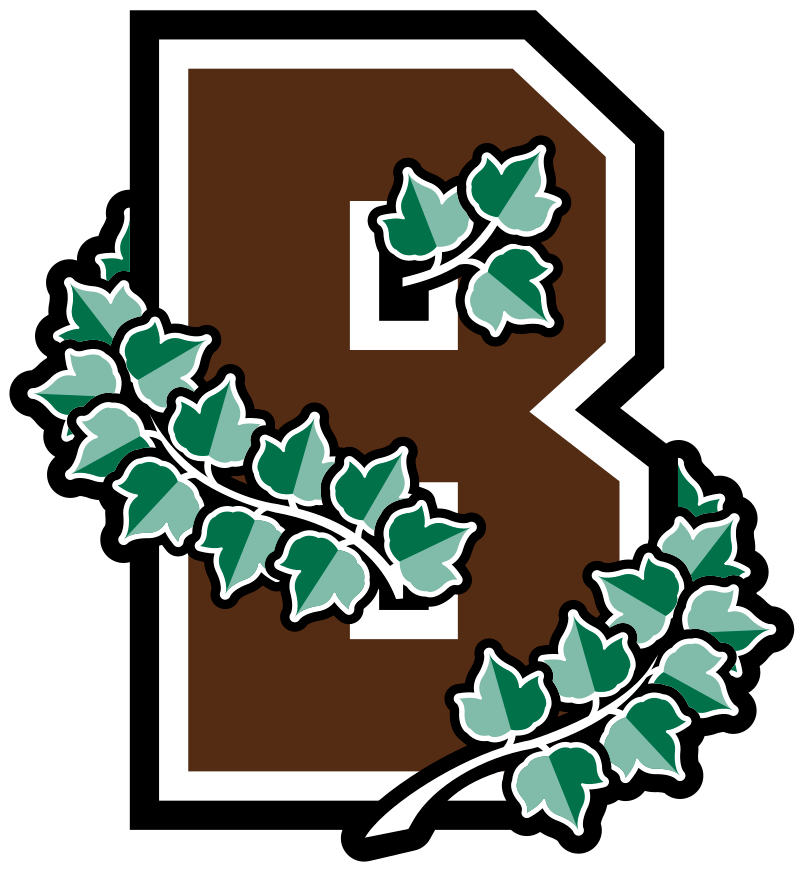


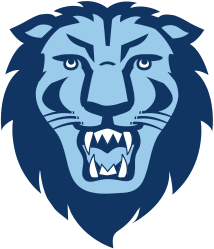


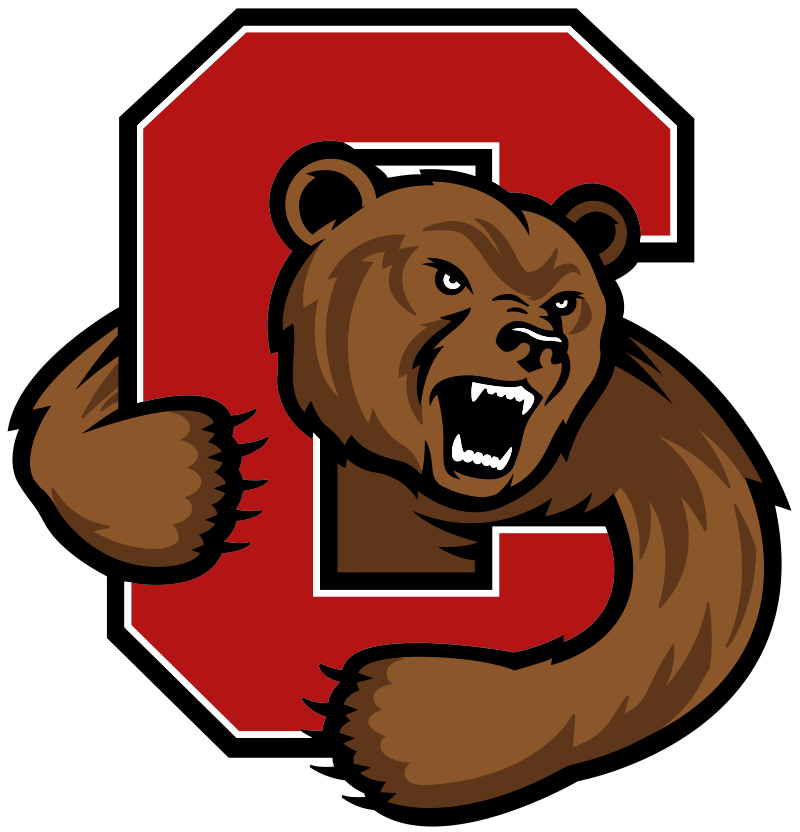


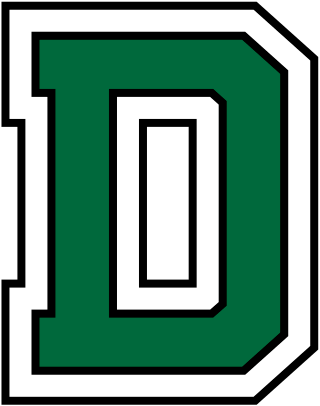


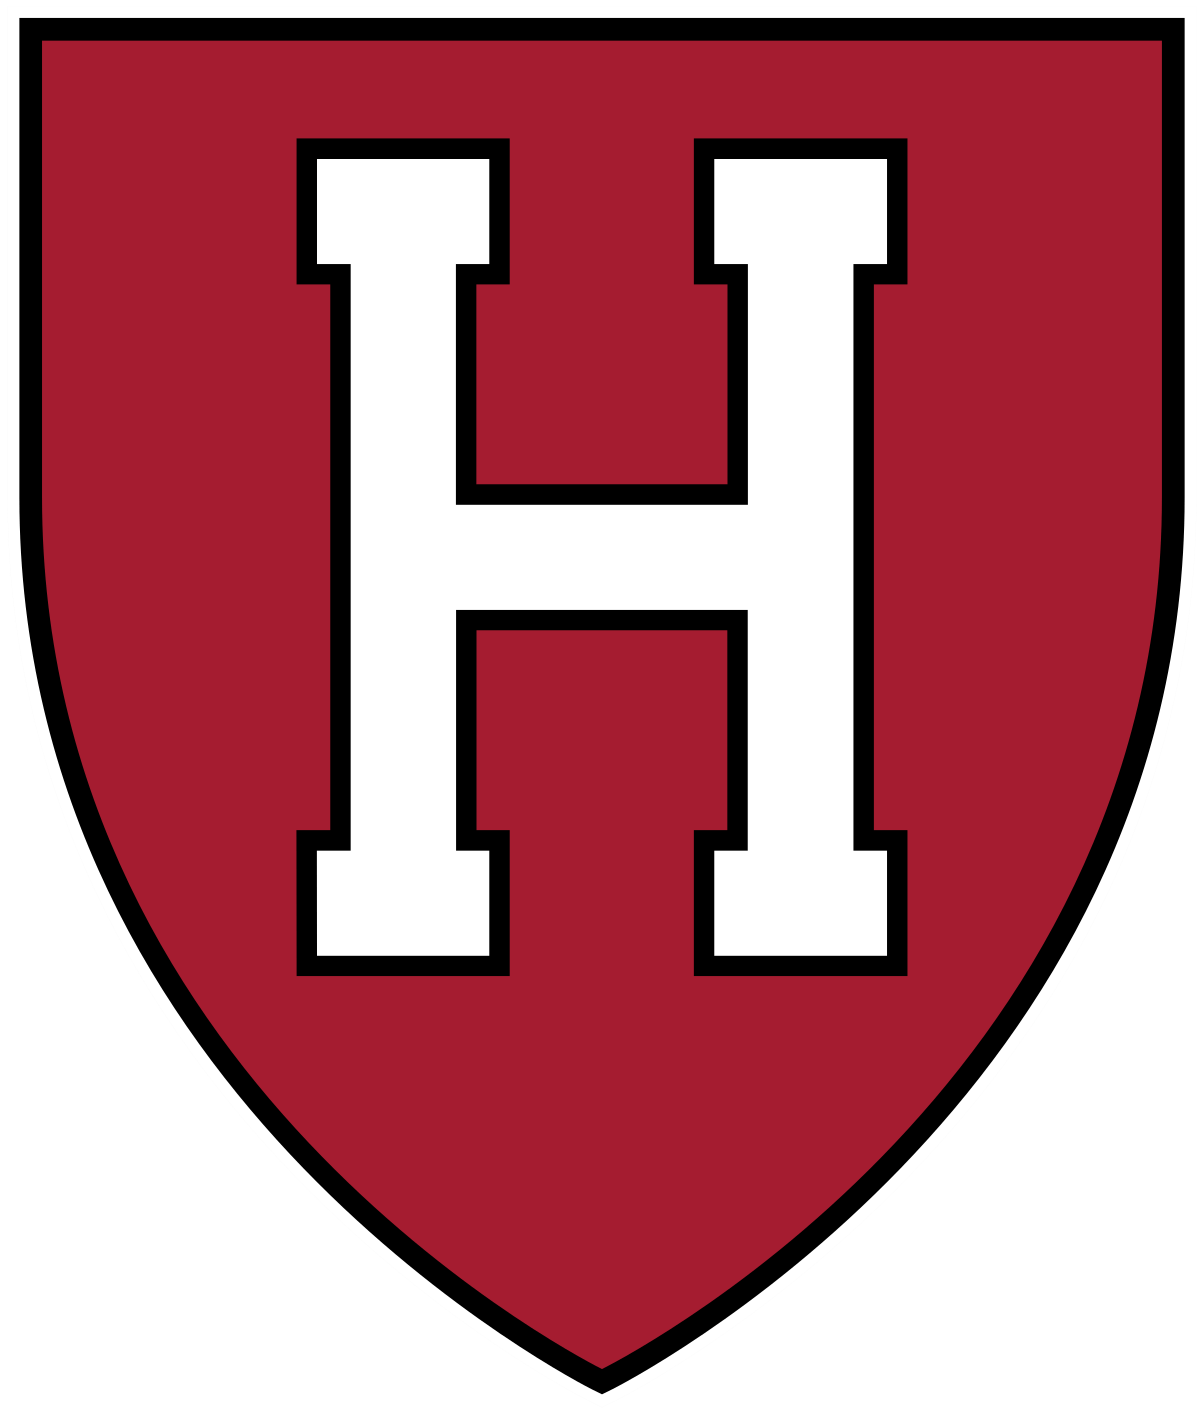


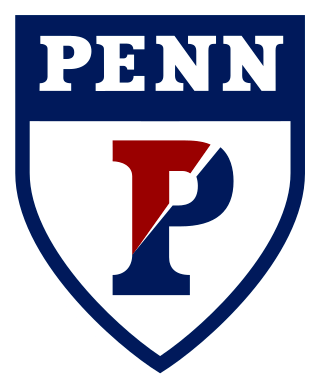


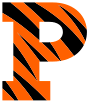


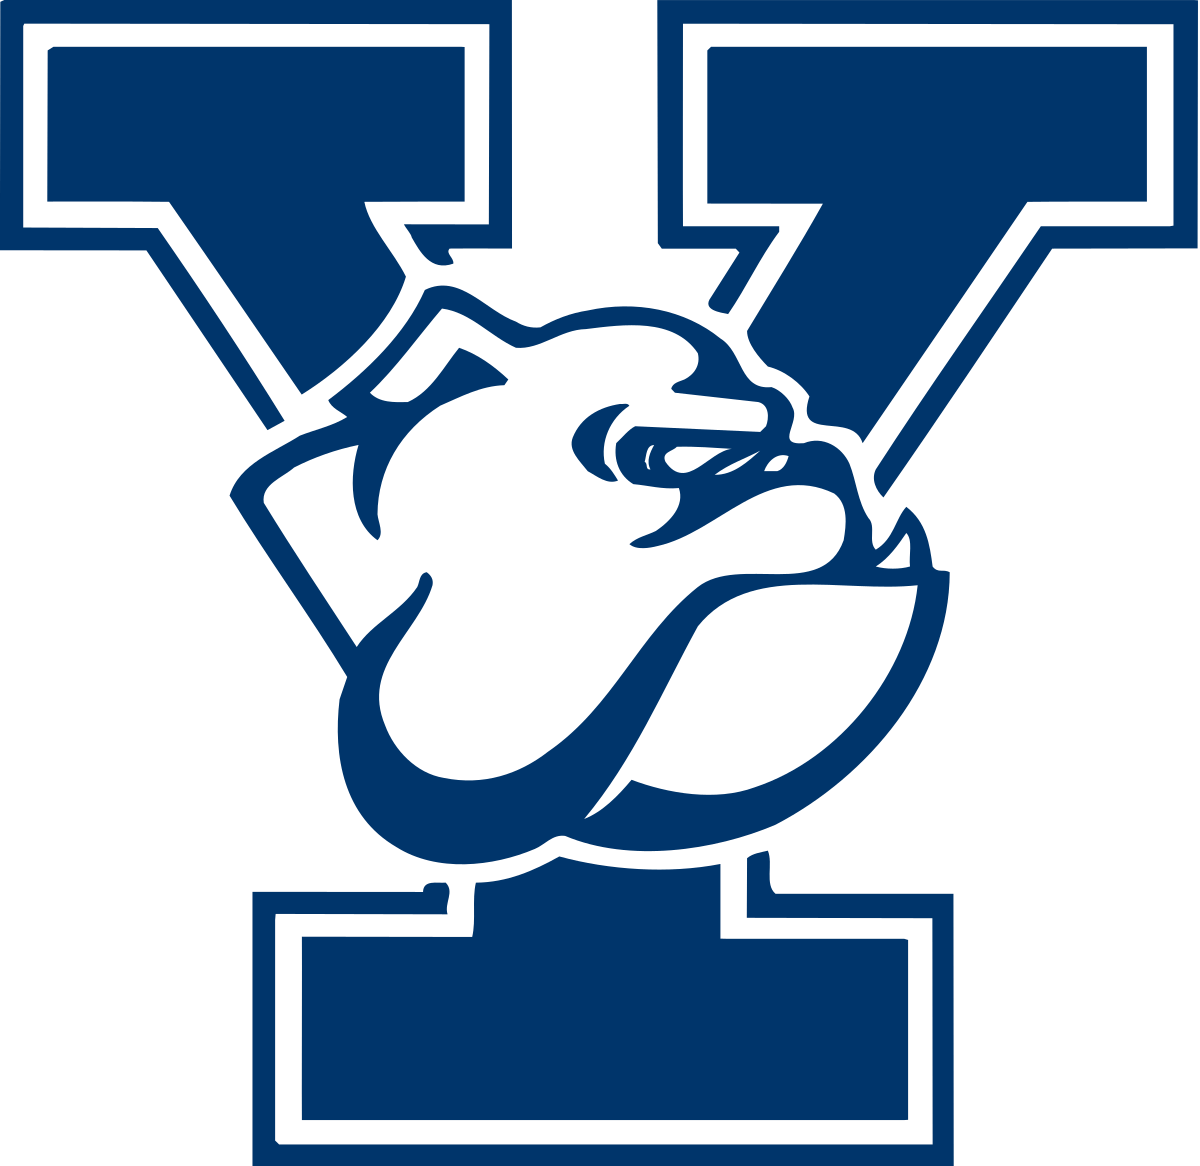

In [36]:
for i in ["Brown", "Columbia", "Cornell", "Dartmouth", "Harvard", "Pennsylvania", "Princeton", "Yale"]:
    generate_rd_chart(i,2010,2020)

In [37]:
df = generate_ivy_pythags(2015,2020)
start = 2015
end = 2020
fig = px.bar(df, x="team_name", y=["pythagenpat_pct", "actual_pct"], barmode="group")
fig.update_layout( 
title = "Actual vs. Pythagenpat Expected Win Pct.<br>"+str(start)+" to "+str(end),
title_xanchor = "center",
title_yanchor = "top",
title_x =  0.5,
yaxis_title="Percentage",
xaxis_title="School"
)
fig.update_yaxes(
ticklabelposition="inside top",
)
fig.show()

In [92]:
df = get_rd_data("Cornell",2010,2020)
fig = px.line(df, x=df.index, y="cumulative_rd", hover_name="opponent")
fig.show()

In [ ]:
fig = go.Figure()

standings = pd.read_csv("data/ivy_league_standings_2015_to_2019.csv")
for i in ["Brown", "Columbia", "Cornell", "Dartmouth", "Harvard", "Pennsylvania", "Princeton", "Yale"]:

standings = pd.read_csv("data/ivy_league_standings_2015_to_2019.csv")
standings.transpose()

# Add traces
fig.add_trace(go.Scatter(x=[], y=random_y0,
                    mode='markers',
                    name='markers'))
fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines+markers',
                    name='lines+markers'))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='lines',
                    name='lines'))

fig.show()

In [149]:
standings = pd.read_csv("data/ivy_league_standings_2015_to_2019.csv")

standings# for team in teams
#     team_results = standings[standings.Team==team]
#     for year in years:
#         standings[str(year)].values[0]

,Team,2019,2018,2017,2016,2015
0,Brown,5,8,8,7,7
1,Columbia,2,2,3,5,1
2,Cornell,8,6,5,8,4
3,Dartmouth,6,3,4,2,3
4,Harvard,1,4,6,6,5
5,Penn,4,5,2,4,2
6,Princeton,7,7,7,1,8
7,Yale,3,1,1,3,6
8,Champions,Harvard,Columbia,Yale,Princeton,Columbia


### <a name="analysis"></a>Analysis

In [128]:
data = get_cornell_batting_stats(2015)
data.groupby(by="name").agg({"wrc":"sum"}).sort_values(by="wrc")

,wrc
name,
"Morris, Parker",-0.983831
"Blackstone, Mitch",-0.644786
"Charles, Lachlan",-0.471201
"Giuliano, Dave",-0.336268
"Russell, Shane",-0.323973
"Steigerwald, Alex",-0.310922
"Ross, Ryan",-0.310922
"Charles, Anthony",0.141349
"Smith, Jamie",0.914399


In [130]:
pitching_data = get_cornell_pitching_stats(2015)
pitching_data.sort_values(by="fip")

,player_id,name,year,innings_pitched,runs,era,fip,runs_per_ip,class_year
32,1997331.0,"Bailey, Garrett",2018,2.1,3.0,11.57,1.841000,1.428571,Fr
36,1884378.0,"Natoli, John",2018,1.2,NaN,0.00,1.841000,0.000000,So
77,1652420.0,"Lannoo, Peter",2015,10.1,3.0,2.61,2.030030,0.297030,Fr
0,2111707.0,"Lillios, Nikolas",2020,5.1,1.0,1.69,2.497235,0.196078,So
75,1332286.0,"Urbon, Kellen",2015,45.2,22.0,2.36,2.595832,0.486726,Jr
...,...,...,...,...,...,...,...,...,...
69,1652396.0,"Wickham, Dale",2015,0.2,1.0,13.50,16.733000,5.000000,Fr
68,1439154.0,"McGee, Collin",2016,1.2,7.0,32.40,26.822000,5.833333,Sr
49,1779082.0,"Pannullo, Rob",2017,0.2,NaN,0.00,31.861000,0.000000,Sr
83,1546994.0,"Soltis, Scott",2015,0.2,4.0,54.00,46.733000,20.000000,So


In [137]:
pitching_data = get_cornell_pitching_stats(2015)
pitching_data.sort_values(by="innings_pitched")

,player_id,name,year,innings_pitched,runs,era,fip,runs_per_ip,class_year
83,1546994.0,"Soltis, Scott",2015,0.2,4.0,54.00,46.733000,20.000000,So
69,1652396.0,"Wickham, Dale",2015,0.2,1.0,13.50,16.733000,5.000000,Fr
53,1779081.0,"Morris, Parker",2016,0.2,1.0,13.50,61.822000,5.000000,Fr
49,1779082.0,"Pannullo, Rob",2017,0.2,NaN,0.00,31.861000,0.000000,Sr
66,1652421.0,"Le Dorze, Pierre",2016,1.0,4.0,36.00,7.822000,4.000000,So
...,...,...,...,...,...,...,...,...,...
43,1547000.0,"Willittes, Tim",2017,50.0,40.0,6.12,4.881000,0.800000,Sr
44,1546998.0,"Balestrieri, Paul",2017,57.2,23.0,2.18,3.416944,0.402098,Sr
15,1884389.0,"Wyatt, Colby",2019,63.2,36.0,3.68,3.659861,0.569620,Jr
27,1997324.0,"Urbon, Seth",2018,65.1,44.0,5.37,4.206591,0.675883,So


In [129]:
# weighted runs created by class year 
data = get_cornell_batting_stats(2015)
data.groupby(by="class_year").agg({"wrc":"sum"}).sort_values(by="wrc")

,wrc
class_year,
Fr,79.118239
So,147.198551
Jr,282.095836
Sr,385.662745


In [135]:
pitching_data = get_cornell_pitching_stats(2015)
pitching_data.groupby(by="class_year").agg({"innings_pitched":"sum"}).sort_values(by="innings_pitched")

,innings_pitched
class_year,
Fr,196.7
So,290.5
Sr,525.2
Jr,562.6


In [118]:
totals = {"year":[], "cu_woba":[], "ivy_woba":[], "cu_fip":[], "ivy_fip":[]}
years = [2015,2016,2017,2018,2019,2020]
for year in years: 
    ivy_woba = get_ivy_woba(year)
    cu_woba = get_cornell_woba(year)
    cu_fip = get_cornell_fip(year)
    ivy_fip = get_ivy_fip(year)
    totals["year"].append(year)
    totals["cu_woba"].append(cu_woba)
    totals["ivy_woba"].append(ivy_woba)
    totals["cu_fip"].append(cu_fip)
    totals["ivy_fip"].append(ivy_fip)
    totals_df = pd.DataFrame(totals)
    totals_df = totals_df.set_index("year")
    
totals_df

,cu_woba,ivy_woba,cu_fip,ivy_fip
year,,,,
2015,0.318714,0.349224,3.850534,4.307850
2016,0.321593,0.336427,4.467034,4.412553
2017,0.374476,0.355486,4.486407,4.506830
2018,0.343848,0.334721,4.370231,4.619414
2019,0.296286,0.355294,4.158912,4.815734
2020,0.250886,0.315258,5.909000,5.740418
